# Code example
## Load NIFTI file

This example shows how to use tipl::io::nifti to load a nifti file and visualize one axial slice.

In [1]:
#include "TIPL/tipl.hpp" // git clone http://github.com/frankyeh/TIPL

In [2]:
tipl::io::nifti nii;
if(!nii.load_from_file("mni_icbm152_t1.nii"))
    return;

In [3]:
nii.width()

197

In [4]:
nii.get_descrip()

"mnc2nii mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.mnc mni_icbm"

In [5]:
tipl::vector<3,float> vs;
nii.get_voxel_size(vs);
vs

1 1 1 

## Image
TIPL's image class is a template class using dimension and value type as the variable

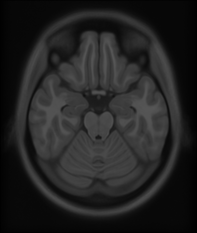

In [6]:
tipl::image<float,3> I;
nii >> I;
I.slice_at(50)

In [7]:
I.geometry()

(197,233,189)

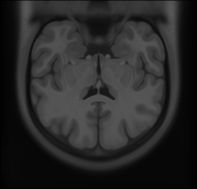

In [8]:
tipl::image<float,2> coronal_slice_at_100;
tipl::volume2slice(I, coronal_slice_at_100, 1 /* 0,1,2 for saggital,coronal,axial slice */, 100);
coronal_slice_at_100

## Basic Image Operations


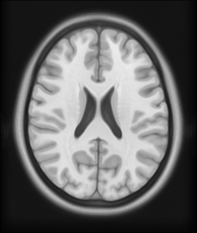

In [9]:
tipl::normalize(I,255);
I

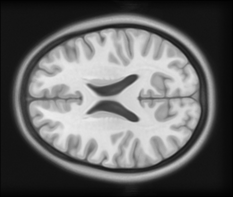

In [10]:
auto J = I;
tipl::swap_xy(J);
J

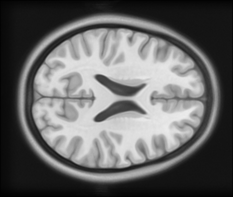

In [11]:
tipl::flip_x(J);
J

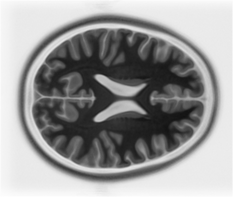

In [12]:
tipl::negate(J);
J

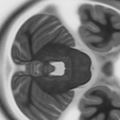

In [13]:
tipl::crop(J,tipl::vector<3>(30,30,0),tipl::vector<3>(150,150,80));
J

## Segmentation
Using Otsu's threshold to create a mask

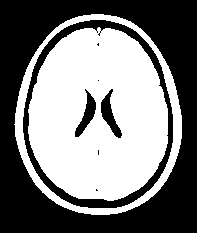

In [14]:
tipl::image<unsigned char,3> mask;
tipl::segmentation::otsu(I,mask,255);
mask

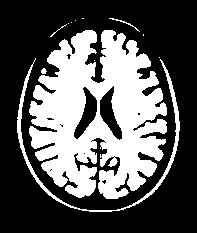

In [15]:
tipl::threshold(I,mask,160);
mask

## Morphological Functions
Morphological function operates on binary mask to change its topology

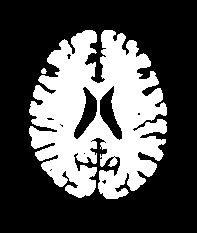

In [16]:
tipl::morphology::defragment(mask);
mask

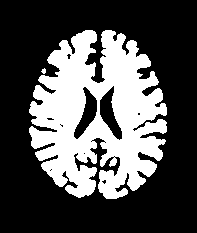

In [17]:
tipl::morphology::smoothing(mask);
mask

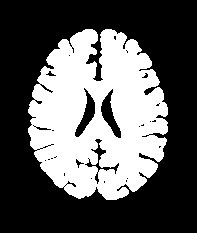

In [18]:
tipl::morphology::dilation(mask);
mask

## Filters

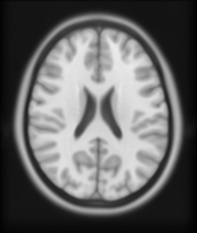

In [19]:
auto J = I;
tipl::filter::mean(J);
J

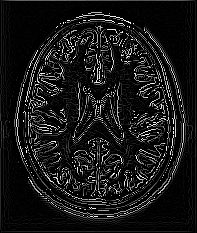

In [20]:
auto J = I;
tipl::filter::canny_edge(J);
J

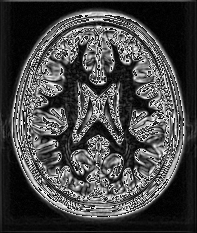

In [21]:
auto J = I;
tipl::filter::sobel(J);
J

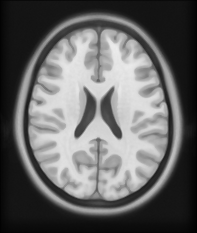

In [22]:
auto J = I;
tipl::filter::anisotropic_diffusion(J);
J

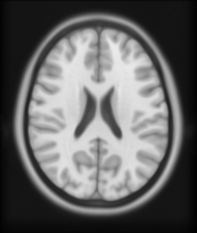

In [23]:
auto J = I;
tipl::filter::gaussian(J);
J